# 9. Nearest Centroid

The Nearest Centroid classifier is a simple and intuitive classification algorithm. It works by calculating the centroid (mean) of each class in the training data and then classifying a new data point based on the nearest centroid.
The k-NN classifier, on the other hand, classifies a new data point based on the majority class among its k nearest neighbors in the training data.

### Reasons to Use Nearest Centroid
1. **Simplicity and Speed**: Nearest Centroid is computationally simpler and faster, especially for large datasets, because it only requires calculating the mean of each class during training and a simple distance calculation during prediction.

2. **Noise Robustness**: Nearest Centroid can be more robust to noise in the data. Since it uses the mean of each class, it is less affected by individual noisy data points compared to k-NN, which considers the nearest neighbors that might include noisy points.

3. **Memory Efficiency**: Nearest Centroid requires less memory as it only needs to store the centroids of each class, whereas k-NN needs to store all training data points.

4. **Interpretability**: The centroids can provide a clear and interpretable representation of each class, which can be useful for understanding the data.

### We use k-NN for
1. **Non-linear Boundaries**: k-NN can capture more complex, non-linear decision boundaries because it considers the local structure of the data.

2. **Small Datasets**: k-NN can be more effective for small datasets where the computational cost is not prohibitive, and the local structure is more important.

3. **Parameter Tuning**: k-NN provides flexibility with the choice of k, which can be tuned to optimize performance.

Both Nearest Centroid and k-NN have their strengths and weaknesses. Using both can provide complementary insights and potentially better performance depending on the specific characteristics of the dataset and the problem at hand.

In [17]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [18]:
df = pd.read_csv("../2_data/X_train.csv")

# Load the dataset

# Read the dataset from CSV files
X_train = pd.read_csv("../2_data/X_train.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

# Ensure the target variable has the correct shape (1D array)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5634, 91)
X_test shape: (1409, 91)
y_train shape: (5634,)
y_test shape: (1409,)


## Feature Preparation

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (5634, 91)
X_test_scaled shape: (1409, 91)


In [20]:
from sklearn.neighbors import NearestCentroid

# Initialize the Nearest Centroid classifier
clf = NearestCentroid()

# Train the classifier on the scaled training data
clf.fit(X_train_scaled, y_train)

# Print the centroids of each class
print("Centroids of each class:")
print(clf.centroids_)

Centroids of each class:
[[ 0.00000000e+00  3.46770564e-03 -6.55353285e-02  3.24849602e-02
  -8.67057218e-02  8.88221848e-02  1.47717591e-01  1.29388238e-01
  -2.45709676e-02  4.52534366e-03  1.91159070e-02 -9.70719554e-03
   8.88558963e-02  1.71165529e-01  2.11843947e-01 -4.94925120e-03
  -3.03478944e-03 -2.58860667e-02 -1.37424930e-01 -3.05404491e-02
   1.03464708e-01  4.91597557e-02  3.79646009e-02  9.90114376e-02
  -3.93969789e-02 -3.87254058e-02 -2.81279502e-02 -1.04361785e-01
  -1.16281422e-01 -1.15748928e-01  1.18282587e-01  1.91474501e-02
   3.10271390e-03  1.33869889e-01  1.33146693e-01  4.55242860e-01
   7.71185618e-02  8.88221848e-02  2.11542633e-01 -1.15748928e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  7.88673434e-02
   6.81566212e-02  9.31341708e-03  2.14086233e-03 -1.28202862e-01
   5.26226482e-03  5.62381098e-02 -1.66044630e-01 -2.73022028e-01
   1.14790267e-01  2.00910627e-01 -1.11525281e-01  1.29826736e-01
  -3.50246165e-02 -1.50705571e-01  1.37424930e-01  

In [21]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and evaluate the model
accuracy_scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, scoring='accuracy')
precision_scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, scoring='precision_weighted')
recall_scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, scoring='recall_weighted')
f1_scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, scoring='f1_weighted')
roc_auc_scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, scoring='roc_auc_ovr')

# Calculate the averages
average_scores = {
    'accuracy': accuracy_scores.mean(),
    'precision': precision_scores.mean(),
    'recall': recall_scores.mean(),
    'f1': f1_scores.mean(),
    'roc_auc': roc_auc_scores.mean()
}

# Convert the averages to a DataFrame
average_scores_df = pd.DataFrame([average_scores])

# Save the averages to a CSV file
average_scores_df.to_csv("../2_data/evaluation_metrics/NearestCentroid_cv.csv", index=False)

/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 370, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/canis/Library/CloudStor

In [22]:
# Make predictions on the scaled test data
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

In [23]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')


evaluation_metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc_auc": roc_auc
}
evaluation_df = pd.DataFrame([evaluation_metrics])
evaluation_df.to_csv("../2_data/evaluation_metrics/NearestCentroid_prediction.csv", index=False)


Accuracy: 0.80
Precision: 0.84
Recall: 0.80
F1 Score: 0.81
ROC AUC Score: 0.81


## Evaluation

1. **Accuracy**
    - Accuracy measures the proportion of correct classifications made by the model. In the context of customer churn prediction, it indicates the overall number of customers correctly classified as either churned or not churned.
    - In this project, an accuracy of 0.80 suggests that the Nearest Centroid model performs well in distinguishing between customers who will churn and those who will not. However, accuracy alone may not be the most reliable metric for an imbalanced dataset, like churn prediction, where the number of churned customers is much smaller compared to non-churned customers.

2. **Precision and Recall**
    - Precision is the proportion of correctly predicted positive observations (churned customers) out of all observations predicted to be positive.
    - Recall is the proportion of correctly predicted positive observations out of all actual positive observations (all churned customers).
    - In churn prediction, precision helps to minimize false positives, ensuring that customers classified as likely to churn are actually at risk of churning. Recall helps to minimize false negatives, ensuring the model does not miss many of the churned customers. These metrics are particularly useful when dealing with imbalanced datasets.
    - The Nearest Centroid model achieved a precision of 0.84 and a recall of 0.80, indicating that it is good at identifying most of the churned customers with a moderate number of false positives.

3. **F1-Score**
    - The F1-Score is the harmonic mean of precision and recall, providing a balance between both metrics. It is particularly useful when you need a single score that considers both false positives and false negatives.
    - In churn prediction, the F1-score is useful because it provides a balance between precision and recall, especially when a high recall or high precision alone might not be sufficient. The Nearest Centroid model achieved an F1-score of 0.81, indicating a good balance between precision and recall.

4. **ROC-AUC Score**
    - The ROC-AUC score measures the ability of the model to distinguish between positive and negative classes (churned vs. not churned). It is a summary of the ROC curve, where AUC represents the area under the curve. A higher AUC value indicates better performance in distinguishing between the two classes.
    - In churn prediction, the ROC-AUC score helps evaluate the model's ability to correctly differentiate churned customers from those who do not churn. It is particularly useful in assessing different thresholds to understand the model's overall performance in distinguishing between classes.
    - The Nearest Centroid model achieved a ROC-AUC score of 0.81, indicating a good ability to distinguish between churned and non-churned customers.


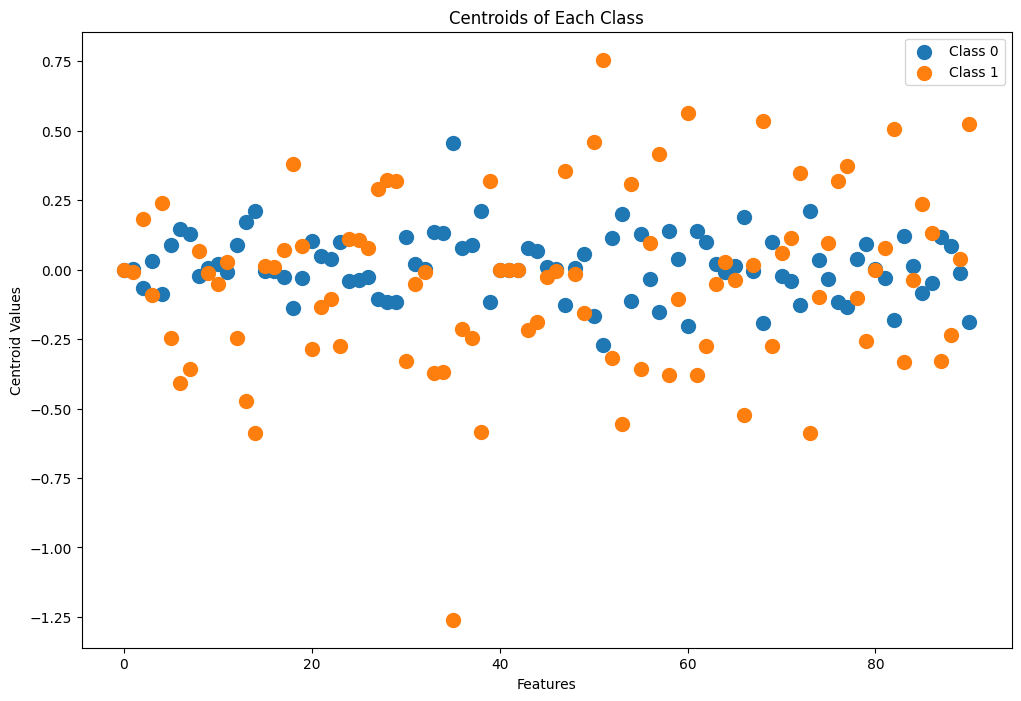

In [24]:
# Convert centroids to a DataFrame for easier plotting
centroids_df = pd.DataFrame(clf.centroids_, columns=X_train.columns)

# Plot the centroids with a scatter plot for better visualization
plt.figure(figsize=(12, 8))
for i, centroid in enumerate(clf.centroids_):
    plt.scatter(range(len(centroid)), centroid, label=f'Class {i}', s=100)

plt.title('Centroids of Each Class')
plt.xlabel('Features')
plt.ylabel('Centroid Values')
plt.legend()
plt.show()